# Test Notebook

### Import libraries and magic

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import joblib
import time

### Load data

In [15]:
# Load test data
X = np.load('ships_dataset/ship_data.npy')
y = np.load('ships_dataset/ship_labels.npy')
X_test = X.reshape(X.shape[0], -1) 

# Load trained models using joblib
rf_model = joblib.load('rf_no_reduction.pkl')
svm_model = joblib.load('svm_no_reduction.pkl')
rf_pca_model = joblib.load('rf_pca.pkl')
svm_pca_model = joblib.load('svm_pca.pkl')
rf_isomap_model = joblib.load('rf_isomap.pkl')
svm_isomap_model = joblib.load('svm_isomap.pkl')

### Evaluate models

In [17]:
# Evaluate models with inference time measurement

def evaluate_model(model, X_test, y_test, model_name):
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    inference_time = end_time - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print()
    print(f"{model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Inference Time: {inference_time} seconds")
    print("Confusion Matrix:\n", cm)
    
    return cm

In [19]:
evaluate_model(rf_model, X_test, y, "Random Forest (No Reduction)")


Random Forest (No Reduction)
Accuracy: 0.9885
F1 Score: 0.9768844221105528
Inference Time: 0.3081059455871582 seconds
Confusion Matrix:
 [[2982   18]
 [  28  972]]


array([[2982,   18],
       [  28,  972]], dtype=int64)

In [25]:
evaluate_model(svm_model, X_test, y, "SVM (No Reduction)")


SVM (No Reduction)
Accuracy: 0.9945
F1 Score: 0.9889558232931727
Inference Time: 88.11416959762573 seconds
Confusion Matrix:
 [[2993    7]
 [  15  985]]


array([[2993,    7],
       [  15,  985]], dtype=int64)

In [21]:
evaluate_model(rf_pca_model, X_test, y, "Random Forest with PCA")


Random Forest with PCA
Accuracy: 0.99025
F1 Score: 0.9801121876593575
Inference Time: 0.6068501472473145 seconds
Confusion Matrix:
 [[3000    0]
 [  39  961]]


array([[3000,    0],
       [  39,  961]], dtype=int64)

In [27]:
evaluate_model(svm_pca_model, X_test, y, "SVM with PCA")


SVM with PCA
Accuracy: 0.83925
F1 Score: 0.7021769337656323
Inference Time: 0.7539591789245605 seconds
Confusion Matrix:
 [[2599  401]
 [ 242  758]]


array([[2599,  401],
       [ 242,  758]], dtype=int64)

In [23]:
evaluate_model(rf_isomap_model, X_test, y, "Random Forest with Isomap")


Random Forest with Isomap
Accuracy: 0.90425
F1 Score: 0.7963849016480595
Inference Time: 3.116616725921631 seconds
Confusion Matrix:
 [[2868  132]
 [ 251  749]]


array([[2868,  132],
       [ 251,  749]], dtype=int64)

In [29]:
evaluate_model(svm_isomap_model, X_test, y, "SVM with Isomap")


SVM with Isomap
Accuracy: 0.854
F1 Score: 0.6737430167597765
Inference Time: 3.4254558086395264 seconds
Confusion Matrix:
 [[2813  187]
 [ 397  603]]


array([[2813,  187],
       [ 397,  603]], dtype=int64)

**The best pipeline is SVM (No Reduction)**

**SVM (No Reduction) Confusion Matrix:**

\[
\begin{bmatrix}
2993 & 7 \\
15 & 985 \\
\end{bmatrix}
\]

This matrix indicates that the model correctly classified most samples, with only a few misclassifications (7 false positives and 15 false negatives).


In [31]:
# Visualize misclassified samples for the best model

def plot_misclassified_samples(model, X_test, y_test, n_samples=5):
    y_pred = model.predict(X_test)
    misclassified_indices = np.where(y_pred != y_test)[0]
    fig, axs = plt.subplots(1, n_samples, figsize=(15, 6))
    
    for i, idx in enumerate(misclassified_indices[:n_samples]):
        axs[i].imshow(X_test[idx].reshape(80, 80, 3).astype(np.uint8))
        axs[i].set_title(f"Predicted: {y_pred[idx]}, Actual: {y_test[idx]}")
        axs[i].axis('off')
    plt.show()

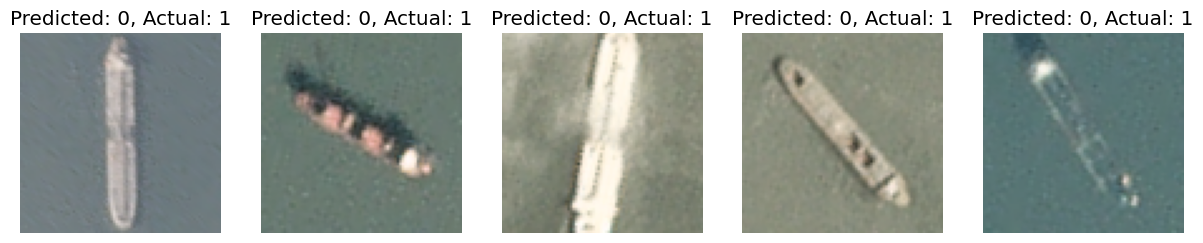

In [35]:
plot_misclassified_samples(svm_model, X_test, y)

Patterns in the misclassified samples:

* Several misclassified images are low in contrast or only display parts of the ship, making it challenging for the model to accurately detect ship features. For example, blurred or dimly lit images lead the model to mistake ships for non-ships due to limited visible detail.
* Some non-ship images contain background elements or shapes that resemble ships (e.g., elongated structures or water reflections), resulting in false positives. The model may have difficulty distinguishing between ships and similar-looking structures due to the lack of distinct separation in these cases.ts!

To address these issues:

- Adding more diverse examples, especially challenging cases like partial or low-contrast images, could enhance the model's robustness.
- Techniques like edge detection or background removal could help the model better focus on ship-specific features.
- Exploring more complex models, such as Convolutional Neural Networks (CNNs), might capture spatial features more effectively.
- Leveraging a pre-trained CNN on a similar dataset could improve the model’s ability to recognize ship-specific patterns. 